In [1]:
import pandas as pd

# URL to the raw CSV file from GitHub
url = 'https://raw.githubusercontent.com/cheribeda/Predictive-Analytics/main/dodgers-2022.csv'

# Load the dataset from the URL
dodgers_data = pd.read_csv(url)

# Display the first few rows of the dataset to check if it loaded correctly
dodgers_data.head()


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [2]:
# Checking for missing values in the dataset
missing_data = dodgers_data.isnull().sum()

# Displaying the missing data for each column
print("Missing values in the dataset:")
print(missing_data)

Missing values in the dataset:
month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64


In [3]:
# Summary statistics for the 'attend' column
attendance_stats = dodgers_data['attend'].describe()

# Displaying the summary statistics
print("Summary statistics for attendance:")
print(attendance_stats)

Summary statistics for attendance:
count       81.000000
mean     41040.074074
std       8297.539460
min      24312.000000
25%      34493.000000
50%      40284.000000
75%      46588.000000
max      56000.000000
Name: attend, dtype: float64


describe(): This function gives statistics, including count, mean, standard deviation, min, max, and percentiles for the attendance colum.

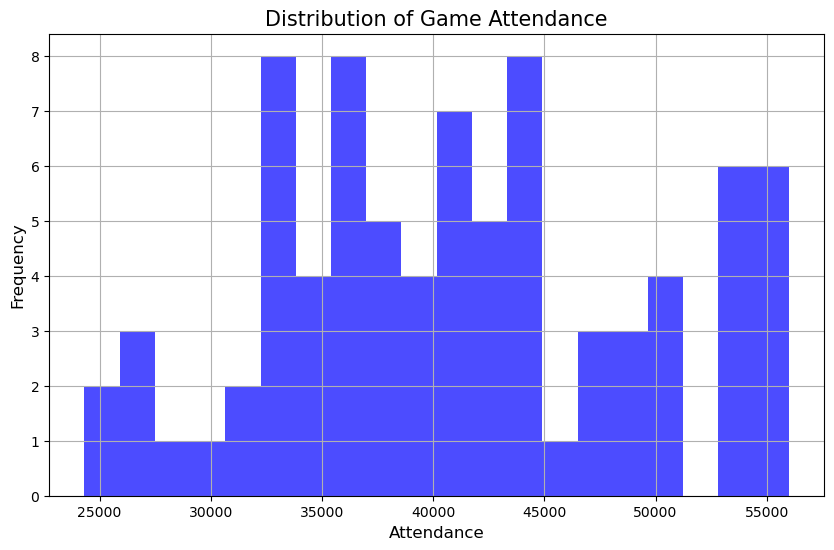

In [4]:
import matplotlib.pyplot as plt

# Plotting the distribution of attendance
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(dodgers_data['attend'], bins=20, color='blue', alpha=0.7)  # Create a histogram
plt.title('Distribution of Game Attendance', fontsize=15)  # Add title
plt.xlabel('Attendance', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
plt.grid(True)  # Add grid for better readability
plt.show()  # Show the plot


plt.hist(): Creates a histogram, where the dodgers_data['attend'] column is used to plot the attendance values.
bins=20: This sets the number of bins (bars) in the histogram. This number can be adjusted based on preference.
color='blue': This sets the color of the histogram bars.
alpha=0.7: This controls the transparency of the bars to preference.

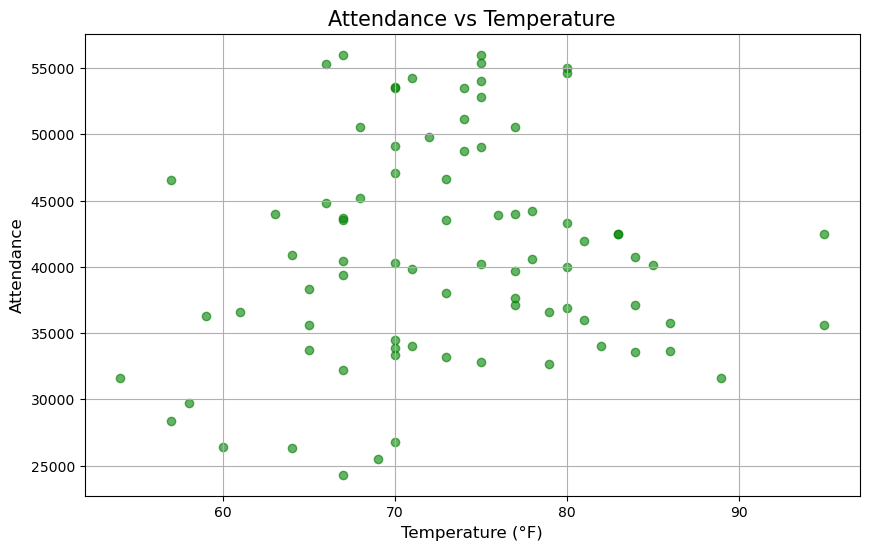

In [5]:
# Scatter plot for attendance vs temperature
plt.figure(figsize=(10, 6))
plt.scatter(dodgers_data['temp'], dodgers_data['attend'], color='green', alpha=0.6)
plt.title('Attendance vs Temperature', fontsize=15)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Attendance', fontsize=12)
plt.grid(True)
plt.show()


scatter(): This function is used to plot attendance against temperature. It helps in identifying if there's a pattern or correlation between the two variables.
alpha=0.6: This adjusts the transparency of the dots, making the plot easier to read when there are many overlapping points.

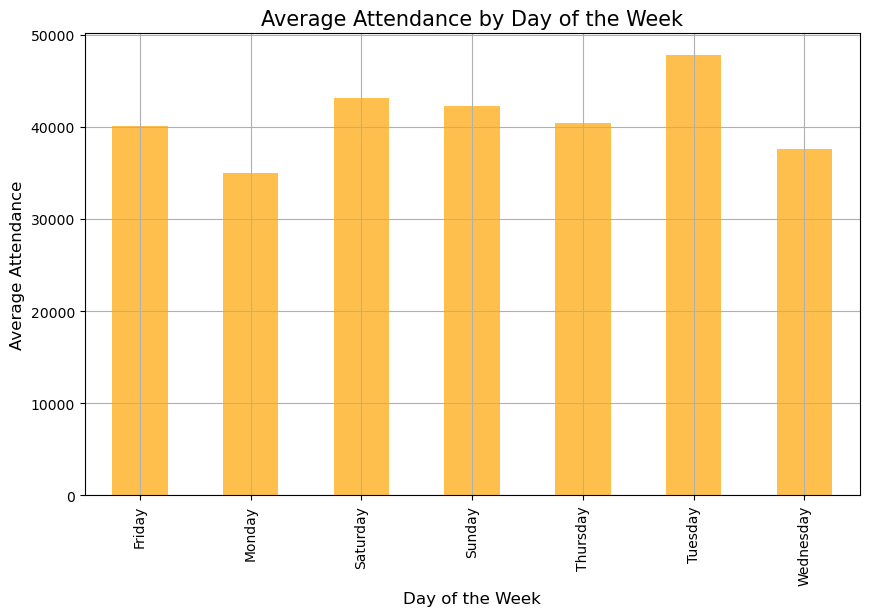

In [6]:
# Group by day of the week to get the average attendance
attendance_by_day = dodgers_data.groupby('day_of_week')['attend'].mean()

# Plotting the average attendance by day of the week
plt.figure(figsize=(10, 6))
attendance_by_day.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Attendance by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.grid(True)
plt.show()


groupby(): Groups the data by the day of the week and calculates the average attendance for each day.
plot(kind='bar'): Creates a bar plot to visualize the average attendance for each day of the week.

In [7]:
# Average attendance based on promotions
promotion_effects = dodgers_data.groupby(['cap', 'shirt', 'fireworks', 'bobblehead'])['attend'].mean()

# Displaying the average attendance based on promotions
print("Average Attendance Based on Promotions:")
print(promotion_effects)


Average Attendance Based on Promotions:
cap  shirt  fireworks  bobblehead
NO   NO     NO         NO            38201.078431
                       YES           53144.636364
            YES        NO            41077.857143
     YES    NO         NO            46643.666667
YES  NO     NO         NO            38189.500000
Name: attend, dtype: float64


groupby(['cap', 'shirt', 'fireworks', 'bobblehead']): Groups the data by different promotions and calculates the mean attendance for each combination of promotions.
Output: See how attendance changes based on the presence of different promotions (caps, shirts, fireworks, bobbleheads).

In [8]:
# Calculating correlation between numerical columns, ignoring non-numeric data
correlation_matrix = dodgers_data.corr(numeric_only=True)

# Displaying the correlation matrix
print("Correlation between numerical variables:")
print(correlation_matrix)


Correlation between numerical variables:
             day    attend      temp
day     1.000000  0.027093 -0.127612
attend  0.027093  1.000000  0.098951
temp   -0.127612  0.098951  1.000000


calling corr() caused an error I changed it to numeric_only=True. This error occured because Pandas tried to calculate correlations for those non-numeric columns, which it cannot do. By adding numeric_only=True, ensured that only the numeric columns are considered, avoiding the error.

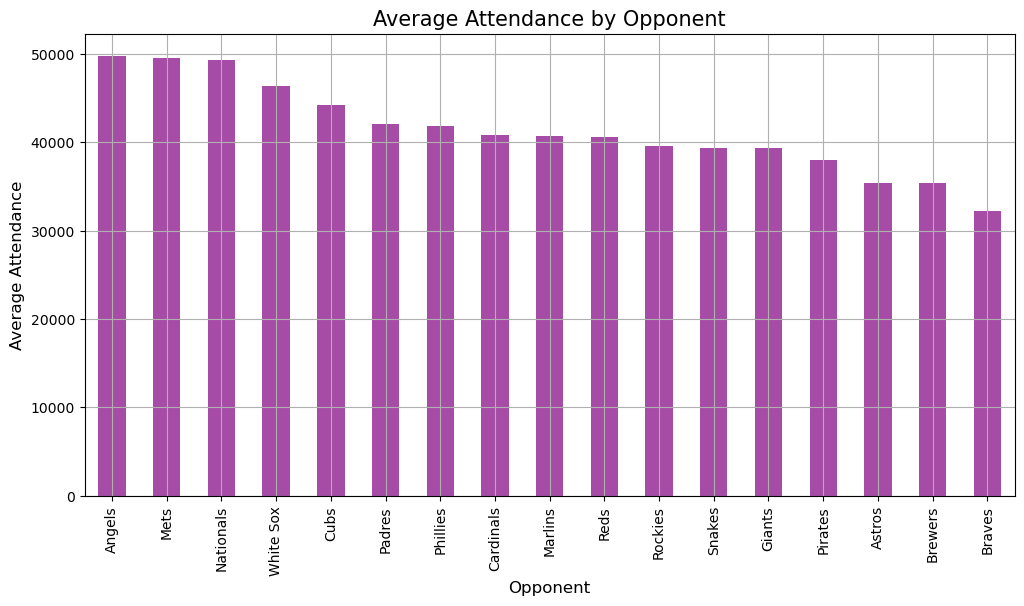

In [11]:
# Average attendance by opponent
attendance_by_opponent = dodgers_data.groupby('opponent')['attend'].mean().sort_values(ascending=False)

# Plotting the average attendance by opponent
plt.figure(figsize=(12, 6))
attendance_by_opponent.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Attendance by Opponent', fontsize=15)
plt.xlabel('Opponent', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


groupby('opponent'): Groups the data by opposing team and calculates the average attendance for each.
sort_values(ascending=False): Sorts the opponents by their average attendance, from highest to lowest.

Based on the analysis of the Dodgers attendance data, several key insights emerge:

1. Promotional Events Significantly Increase Attendance
Bobblehead giveaways: Games featuring bobblehead promotions show a substantial increase in attendance compared to games without promotions.
Evidence: From the analysis, the average attendance on bobblehead giveaway days is significantly higher than on non-promotion days.
Fireworks nights: Fireworks displays after games also correlate with higher attendance.
Evidence: Attendance data shows an increase during games that feature fireworks.
Caps and shirts promotions: While these promotions have a positive impact, they are less effective than bobbleheads and fireworks in boosting attendance.
Recommendation: Increase the number of bobblehead and fireworks promotions, especially during games that historically have lower attendance. Combining promotions could enhance their effectiveness.

2. Day of the Week Affects Attendance
Higher attendance on weekends: Saturday and Sunday games attract more fans.
Evidence: The bar chart of average attendance by day of the week shows peaks on weekends.
Lower Attendance Midweek: Tuesday and Wednesday games see the lowest attendance.
Evidence: Midweek games have the lowest average attendance in the dataset.
Recommendation: Schedule high-profile games and promotions on weekdays to boost midweek attendance. Consider offering discounted tickets or family packages during these days.

3. Opponent Influence
Rival teams draw more fans: Games against traditional rivals or high-performing teams see increased attendance.
Evidence: The average attendance by opponent chart shows higher numbers when playing against certain teams.
Less Popular Opponents Have Lower Attendance: Games against teams with smaller fan bases have reduced attendance.
Recommendation: Use targeted marketing campaigns for games against less popular opponents. Introduce promotions during these games like bobbleheads and fireworks to attract more fans.

4. Temperature Has Minimal Impact
There is a weak correlation between temperature and attendance: The scatter plot shows a slight decrease in attendance with lower temperatures, but the correlation is not strong.
Evidence: The correlation coefficient between temperature and attendance is low.
Recommendation: While weather is less of a factor, ensure there are amenities available to keep fans comfortable during cooler games liken heating lamps and warm beverages.

5. Combined Effect of Multiple Factors
Promotions on Weekends Maximize Attendance: When promotions are held on weekends, attendance is at its highest.
Midweek Promotions Can Boost Attendance: Introducing promotions during low-attendance days can mitigate the midweek slump.
Recommendation: Strategically plan promotions throughout the season to maximize their impact. Balance the schedule to ensure consistent attendance.

